In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
ipo_data = pd.read_csv('ipo.csv')
print(ipo_data.head())


   Unnamed: 0        Date         IPO Name  Issue Size  (in crores)     QIB  \
0           0  17-10-2022  Electronics Mar                   500.00   58.81   
1           1  26-09-2022  Harsha Engineer                   755.00  113.82   
2           2  15-09-2022              TMB                   792.00    0.51   
3           3  06-09-2022  Dreamfolks Serv                   562.10   27.48   
4           4  26-08-2022        Syrma SGS                   840.13   42.42   

     HNI    RII  Total  Issue  Listing Open  Listing Close  Listing Gains(%)  \
0  15.39   8.27  24.23     59         85.90          84.45             43.14   
1  40.36  12.44  47.19    330        495.00         485.90             47.24   
2   1.77   3.44   1.39    525        480.05         508.45             -3.15   
3  14.18  24.19  23.25    326        455.00         462.65             41.92   
4   7.13   2.84  15.59    220        262.00         313.05             42.30   

      CMP  Current  Gains (%)  
0   91.90   

In [ ]:
# Check for missing values
print(ipo_data.isnull().sum())


Unnamed: 0                 0
Date                       0
IPO Name                   0
Issue Size  (in crores)    0
QIB                        0
HNI                        0
RII                        0
Total                      0
Issue                      0
Listing Open               0
Listing Close              0
Listing Gains(%)           0
CMP                        0
Current  Gains (%)         2
dtype: int64


In [ ]:
ipo_data.fillna(ipo_data.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)
ipo_data.fillna(ipo_data.mode().iloc[0], inplace=True)

In [ ]:
# Remove duplicate rows if they exist
ipo_data = ipo_data.drop_duplicates()

In [ ]:
print(ipo_data.columns)
ipo_data['Date'] = pd.to_datetime(ipo_data['Date'], format='%d-%m-%Y', dayfirst=True)



Index(['Unnamed: 0', 'Date', 'IPO Name', 'Issue Size  (in crores)', 'QIB',
       'HNI', 'RII', 'Total', 'Issue', 'Listing Open', 'Listing Close',
       'Listing Gains(%)', 'CMP', 'Current  Gains (%)'],
      dtype='object')


In [ ]:
print(ipo_data.get('Issue Size  (in crores)'))  # Check if it returns None
ipo_data['Issue Size  (in crores)'] = pd.to_numeric(ipo_data['Issue Size  (in crores)'], errors='coerce')
ipo_data['Listing Gains(%)'] = pd.to_numeric(ipo_data['Listing Gains(%)'], errors='coerce')
ipo_data['CMP'] = pd.to_numeric(ipo_data['CMP'], errors='coerce')



0      500.00
1      755.00
2      792.00
3      562.10
4      840.13
        ...  
314      0.00
315    199.80
316     56.25
317    328.70
318    189.80
Name: Issue Size  (in crores), Length: 319, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ipo_data[['Issue Size  (in crores)', 'Listing Gains(%)', 'CMP']] = scaler.fit_transform(ipo_data[['Issue Size  (in crores)', 'Listing Gains(%)', 'CMP']])


In [ ]:
print(ipo_data.info())
print(ipo_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               319 non-null    int64         
 1   Date                     319 non-null    datetime64[ns]
 2   IPO Name                 319 non-null    object        
 3   Issue Size  (in crores)  319 non-null    float64       
 4   QIB                      319 non-null    float64       
 5   HNI                      319 non-null    float64       
 6   RII                      319 non-null    float64       
 7   Total                    319 non-null    float64       
 8   Issue                    319 non-null    int64         
 9   Listing Open             319 non-null    float64       
 10  Listing Close            319 non-null    float64       
 11  Listing Gains(%)         319 non-null    float64       
 12  CMP                      319 non-nul

**Model building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
X = ipo_data[['Issue Size  (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue', 'Listing Open', 'Listing Close']]
y = ipo_data['Listing Gains(%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

# Optional: Feature importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


Root Mean Squared Error (RMSE): 0.5271179329978718
R² Score: 0.6890984421633979
                   Feature  Importance
7            Listing Close    0.321927
1                      QIB    0.124946
6             Listing Open    0.111010
3                      RII    0.108355
0  Issue Size  (in crores)    0.102043
5                    Issue    0.099832
2                      HNI    0.085784
4                    Total    0.046102


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_de

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R²: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.34949454 0.63835448 0.3482254  0.40086981 0.48253655]
Mean Cross-Validation R²: 0.4438961562728382


Feature Engineering

In [ ]:
import numpy as np
ipo_data['Log_Issue_Size'] = np.log1p(ipo_data['Issue Size  (in crores)'])

# Dropping highly correlated features (you can check the correlation matrix to determine this)
# Drop non-numeric columns like 'Date'
numeric_data = ipo_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix on numeric data only
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


# Example: Let's drop 'Listing Open' if it correlates highly with 'Listing Close'
ipo_data.drop(['Listing Open'], axis=1, inplace=True)

# Creating interaction terms
ipo_data['QIB_HNI_Interaction'] = ipo_data['QIB'] * ipo_data['HNI']


                         Unnamed: 0  Issue Size  (in crores)       QIB  \
Unnamed: 0                 1.000000                -0.274529 -0.218244   
Issue Size  (in crores)   -0.274529                 1.000000 -0.037724   
QIB                       -0.218244                -0.037724  1.000000   
HNI                       -0.157533                -0.103484  0.773933   
RII                       -0.200211                -0.147791  0.437462   
Total                     -0.190388                -0.093351  0.815785   
Issue                     -0.388791                 0.364733  0.188105   
Listing Open              -0.394184                 0.267060  0.357168   
Listing Close             -0.445209                 0.279336  0.312527   
Listing Gains(%)          -0.319839                 0.017571  0.395104   
CMP                       -0.237797                 0.071298  0.277750   
Current  Gains (%)        -0.068042                -0.046206  0.239920   
Log_Issue_Size            -0.406230   

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

cross validation analysis

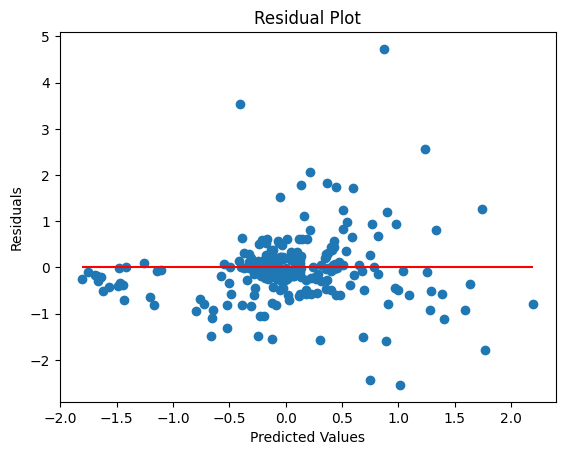

In [ ]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# After running RandomizedSearchCV
best_random_model = random_search.best_estimator_

# Now you can use it for cross-validation
cv_predictions = cross_val_predict(best_random_model, X_train_scaled, y_train, cv=5)

# Residuals
residuals = y_train - cv_predictions

# Plot residuals
plt.scatter(cv_predictions, residuals)
plt.hlines(y=0, xmin=cv_predictions.min(), xmax=cv_predictions.max(), colors='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


nueral network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict on test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R² Score: {r2_nn}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.1644 - val_loss: 0.7869
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0248 - val_loss: 0.6708
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8718 - val_loss: 0.6280
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6793 - val_loss: 0.5984
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7132 - val_loss: 0.5243
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7390 - val_loss: 0.4801
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7100 - val_loss: 0.4491
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5188 - val_loss: 0.4372
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8206 - val_loss: 0.4009
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6252 - val_loss: 0.3905
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6275 - val_loss: 0.3871
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6072 - val_loss: 0.3845
Epoch 13/50

In [ ]:
# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_random_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                   Feature  Importance
7            Listing Close    0.385762
1                      QIB    0.128315
5                    Issue    0.121835
3                      RII    0.107985
6             Listing Open    0.096834
4                    Total    0.063597
0  Issue Size  (in crores)    0.051908
2                      HNI    0.043763
